In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from activ import load_data
import pandas as pd
from activ.analytics import outcomes_histogram
from matplotlib.backends.backend_pdf import PdfPages


In [14]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
fulldata.shape

(586, 919)

In [4]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [5]:
for ii,o in enumerate(sub_oc_features):
    if 'CHARTS' in o:
        print(ii,o)
        

95 CHARTSFAssistUnpaidHours_6mo
96 CHARTSFInHomeAssistTime_6mo
97 CHARTSFOutHomeAssistTime_6mo
98 CHARTSFOutOfBedHours_6mo
99 CHARTSFOutOfHouseDays_6mo
100 CHARTSFAwayFromHomeNights_6mo
101 CHARTSFStudyHours_6mo
102 CHARTSFHomemakingHours_6mo
103 CHARTSFMaintenanceHours_6mo
104 CHARTSFLiveWith_6mo
105 CHARTSFContactAssociates_6mo
106 CHARTSFContactFriends_6mo
107 CHARTSFContactStrangers_6mo
108 CHARTSFPhysicalTotal_6mo
109 CHARTSFCognitiveTotal_6mo
110 CHARTSFMobilityTotal_6mo
111 CHARTSFOccupationTotal_6mo
112 CHARTSFSocialIntegrationTotal_6mo


In [6]:
for ii,o in enumerate(fulldata.columns):
    if 'CHARTS' in o:
        print(ii,o)
        

480 CHARTSFAssistPaidHours_6mo
481 CHARTSFAssistUnpaidHours_6mo
482 CHARTSFInHomeAssistTime_6mo
483 CHARTSFOutHomeAssistTime_6mo
484 CHARTSFOutOfBedHours_6mo
485 CHARTSFOutOfHouseDays_6mo
486 CHARTSFAwayFromHomeNights_6mo
487 CHARTSFPaidJobHours_6mo
488 CHARTSFStudyHours_6mo
489 CHARTSFHomemakingHours_6mo
490 CHARTSFMaintenanceHours_6mo
491 CHARTSFRecreationHours_6mo
492 CHARTSFLiveWith_6mo
493 CHARTSFSpouse_6mo
494 CHARTSFRelatives_6mo
495 CHARTSFContactAssociates_6mo
496 CHARTSFContactFriends_6mo
497 CHARTSFContactStrangers_6mo
498 CHARTSFIncome_6mo
499 CHARTSFMedicalCareExpenses_6mo
500 CHARTSFPhysicalTotal_6mo
501 CHARTSFCognitiveTotal_6mo
502 CHARTSFMobilityTotal_6mo
503 CHARTSFOccupationTotal_6mo
504 CHARTSFSocialIntegrationTotal_6mo
505 CHARTSFSelfSufficientTotal_6mo
671 CHARTSFPhysicalTotal_12mo
672 CHARTSFCognitiveTotal_12mo
673 CHARTSFMobilityTotal_12mo
674 CHARTSFOccupationTotal_12mo
675 CHARTSFSocialIntegrationTotal_12mo
676 CHARTSFSelfSufficientTotal_12mo


In [7]:
sub_oc[:,112]

array([ 100. ,   94. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,
         95. ,  100. ,  100. ,   23. ,  100. ,  100. ,  100. ,  100. ,
        100. ,   39. ,  100. ,  100. ,  100. ,   97. ,  100. ,  100. ,
        100. ,  100. ,  100. ,   79.5,  100. ,  100. ,  100. ,  100. ,
        100. ,   93. ,  100. ,    6. ,   83.5,  100. ,   73. ,  100. ,
        100. ,  100. ,   94. ,  100. ,  100. ,  100. ,  100. ,   70. ,
        100. ,   99. ,  100. ,  100. ,  100. ,  100. ,  100. ,    0. ,
        100. ,   68. ,  100. ,   93. ,  100. ,  100. ,  100. ,  100. ,
         92. ,  100. ,   68. ,   92. ,  100. ,   87.5,  100. ,  100. ,
        100. ,  100. ,  100. ,  100. ,   97. ,   68. ,   59. ,   79. ,
        100. ,  100. ,  100. ,  100. ,   87. ,  100. ,  100. ,  100. ,
         41. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,   66.5,
        100. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,   79.5,
        100. ,  100. ,   51.5,   66. ,   94. ,  100. ,  100. ,  100. ,
      

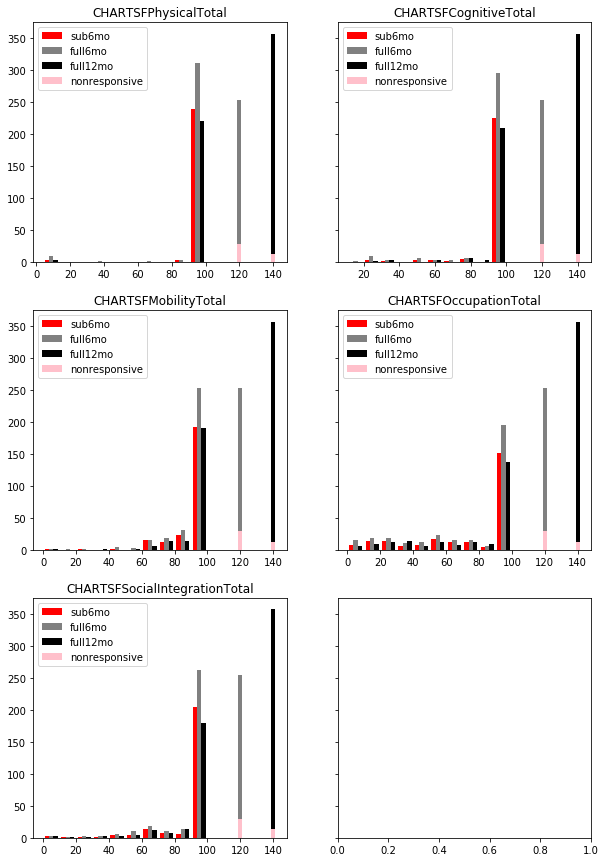

In [17]:
sub6mo = [108,109,110,111,112]
full6mo = [500,501,502,503,504]
full12mo = [671,672,673,674,675]
fig, ax = plt.subplots(3,2,sharey=True,figsize=(10,15))
ax = ax.flatten()
count = 0
names = ['CHARTSFPhysicalTotal','CHARTSFCognitiveTotal',
        'CHARTSFMobilityTotal','CHARTSFOccupationTotal','CHARTSFSocialIntegrationTotal']
for x, y, z, name in zip(sub6mo, full6mo, full12mo, names):
    sub = sub_oc[:,x]
    full6 = fulldata.iloc[:,y]
    full12 = fulldata.iloc[:,z]

    dat = full6
    dat2 = full12
    
    num_na = dat.isna().sum()
    num_na2 = dat2.isna().sum()
    nonresponsive = 29
    nonresponsive2 = 13

    dat_dropna = dat.dropna()
    dat2_dropna = dat2.dropna()
    
    counts, bins, bars = ax[count].hist([sub, dat_dropna, dat2_dropna], color=['red','grey','black'], label=['sub6mo', 'full6mo', 'full12mo'], rwidth=0.8)
    length = (bins[1]-bins[0])/4
    ax[count].set_title('{}'.format(name))
    ax[count].legend()
    
    mx = max(max(dat_dropna),max(dat2_dropna))
    
    na_index = mx*(1+1/5) 
    na_index2 = mx*(1+2/5)
 
    ax[count].bar(na_index, nonresponsive, color='pink', label='nonresponsive', width=length)
    ax[count].bar(na_index, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
    ax[count].bar(na_index2, nonresponsive2, color='pink', width=length)
    ax[count].bar(na_index2, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
    ax[count].legend()
    count += 1
plt.savefig('/Users/ahyeon/Desktop/activ misc/charts_hist.pdf')